# Lab 3: Fruit Classification using Logistic Regression

## Overview
This lab demonstrates the application of logistic regression for classifying fruits based on their weight and size characteristics. We'll use a dataset containing information about apples and oranges to build a binary classification model.

## Dataset Description
The dataset (`fruits.csv`) contains the following features:
- Weight: The weight of the fruit
- Size: The size measurement of the fruit
- Class: The type of fruit (apple or orange)

## Lab Objectives
1. Load and explore the fruits dataset using pandas
2. Visualize the relationship between fruit characteristics using matplotlib
3. Implement logistic regression for fruit classification
4. Evaluate the model's performance
5. Visualize the decision boundary

## Implementation Steps
1. Data Loading and Preprocessing
   - Import required libraries (pandas, numpy, matplotlib, sklearn)
   - Load the dataset using pandas
   - Explore the data structure

2. Data Visualization
   - Create scatter plots to visualize the relationship between weight and size
   - Color-code the points based on fruit type

3. Model Building
   - Split the data into training and testing sets
   - Train a logistic regression model
   - Make predictions on the test set

4. Results Visualization
   - Plot the decision boundary
   - Visualize the classification results

## Expected Outcomes
By the end of this lab, you will understand:
- How to implement binary classification using logistic regression
- The relationship between fruit characteristics and their classification
- How to visualize decision boundaries in a 2D feature space

In [1]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
import seaborn as sns  # For enhanced visualizations

In [2]:
# Load the fruits dataset
CSV_FILE = '../content/fruits.csv'
df = pd.read_csv(CSV_FILE)

# Display the first few rows to understand the data structure
# Weight: Weight of the fruit in grams
# Size: Size measurement in cm
# Class: Target variable (apple or orange)
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


## Data Exploration
Let's examine our dataset to understand its characteristics:
- Shape and size of the dataset
- Distribution of features (Weight and Size)
- Balance between classes (apples vs oranges)

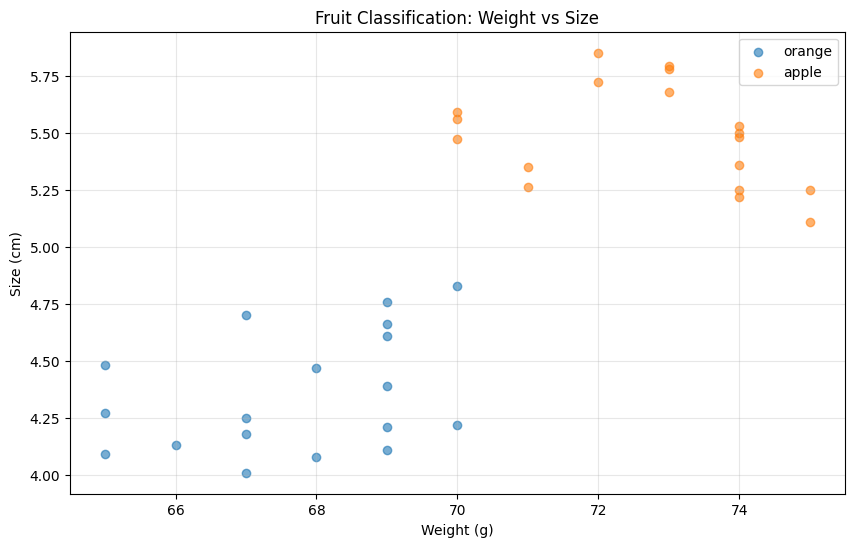


Descriptive Statistics:
          Weight       Size
count  36.000000  36.000000
mean   70.222222   4.922222
std     3.034197   0.619646
min    65.000000   4.010000
25%    68.000000   4.265000
50%    70.000000   4.970000
75%    73.000000   5.485000
max    75.000000   5.850000

Class Distribution:
Class
orange    18
apple     18
Name: count, dtype: int64


In [3]:
# Create a scatter plot to visualize the relationship between Weight and Size
plt.figure(figsize=(10, 6))
for fruit_class in df['Class'].unique():
    mask = df['Class'] == fruit_class
    plt.scatter(df[mask]['Weight'], df[mask]['Size'], 
               label=fruit_class, alpha=0.6)
    
plt.xlabel('Weight (g)')
plt.ylabel('Size (cm)')
plt.title('Fruit Classification: Weight vs Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Add descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())
print("\nClass Distribution:")
print(df['Class'].value_counts())

In [4]:
# Prepare features (X) and target variable (y)
X = df[['Weight', 'Size']]  # Features
y = (df['Class'] == 'apple').astype(int)  # Convert to binary: 1 for apple, 0 for orange

# Split the data into training and testing sets
# We use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (28, 2)
Testing set shape: (8, 2)


In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate and display model performance metrics
from sklearn.metrics import accuracy_score, classification_report
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Orange', 'Apple']))


Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      Orange       1.00      1.00      1.00         4
       Apple       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



/Users/natthawatboonchaiseree/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


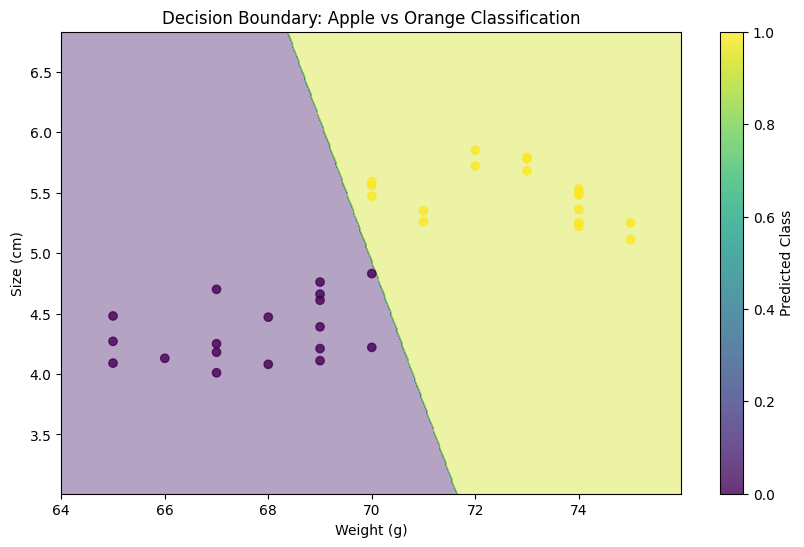


Model Coefficients:
Weight coefficient: 1.3132
Size coefficient: 1.1227
Intercept: -97.4632


In [7]:
# Create a function to plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    
    # Create mesh grid
    x_min, x_max = X['Weight'].min() - 1, X['Weight'].max() + 1
    y_min, y_max = X['Size'].min() - 1, X['Size'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on mesh points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X['Weight'], X['Size'], c=y, alpha=0.8)
    plt.xlabel('Weight (g)')
    plt.ylabel('Size (cm)')
    plt.title('Decision Boundary: Apple vs Orange Classification')
    plt.colorbar(label='Predicted Class')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, model)

# Display model coefficients
print("\nModel Coefficients:")
print(f"Weight coefficient: {model.coef_[0][0]:.4f}")
print(f"Size coefficient: {model.coef_[0][1]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")